In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [90]:
data = pd.read_csv('data/processed/whr_combined.csv')
data = data.drop(['Unnamed: 0'],axis =1)
data.head()

,Country Code,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country_y,p50p90,p90p100,p99p100,pall,Country Name,Crime (Homicide) Score,Unemployment Score,suicide_per_pop
0,AFG,149.857143,3.236286,1.397367,7.718934,0.138803,0.195950,0.173638,2017.0,Afghanistan,0.394250,0.427833,0.149317,3132.269508,Afghanistan,5.912825,8.627500,NaN
1,ALB,104.285714,4.794714,2.160023,10.540497,0.443784,0.140062,0.163143,2017.0,Albania,0.468567,0.339817,0.088800,11957.948217,Albania,4.067445,30.573077,NaN
2,DZA,77.142857,5.461429,2.192973,10.010755,0.208027,0.056871,0.230214,2017.0,Algeria,0.420100,0.380800,0.099100,16592.540783,Algeria,1.109717,27.987857,NaN
3,AGO,140.000000,3.872250,0.798380,0.133902,0.027433,0.105269,0.071570,2015.5,Angola,0.336633,0.565650,0.242033,10853.650233,Angola,4.601430,23.382000,NaN
4,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,NaN,NaN,NaN,23588.936550,Antigua and Barbuda,10.465355,19.840000,0.005206


In [91]:
def get_cat_happiness(row):
    if row <= 3.5:
        return 0
    elif row > 3.5 and row <= 5:
        return 1
    elif row > 5 and row <= 6.5:
        return 2
    else:
        return 3

In [92]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

data.drop('Happiness Rank', axis=1, inplace=True)
data.drop('Country Name', axis=1, inplace=True)
data.drop('Country_y', axis=1, inplace=True)
data.drop('Country Code', axis=1, inplace=True)
data['Happiness'] = data['Happiness Score'].apply(get_cat_happiness)
data.drop('Happiness Score', inplace=True, axis=1)

data.dropna(inplace=True)

X = data.drop('Happiness', axis=1)
y = data['Happiness']

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv_kfold = KFold(n_splits=5)

# parameter combinations that will be tested for a Random Forest model
param_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 200],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_depth': [3, 5, 10, 20]
}

model = RandomForestClassifier()

grid_cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_kfold)
grid_cv.fit(X_train, y_train)
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10)

In [98]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8418181818181818
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [99]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print('Accuracy on the training data: {}'.format(accuracy_score(model.predict(X_train), y_train)))
print('Accuracy on the testing data: {}'.format(accuracy_score(prediction, y_test)))

Accuracy on the training data: 0.8235294117647058
Accuracy on the testing data: 0.6538461538461539


C:\Users\markt\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\markt\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\markt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


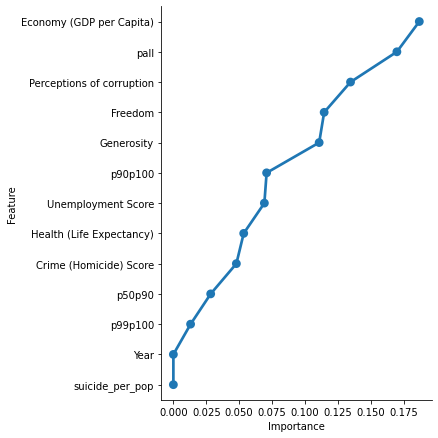

In [100]:
feature_values = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})
feature_values = feature_values.sort_values('Importance', ascending=False)

sns.factorplot('Importance', 'Feature', data=feature_values, size=6)

# Prosperity stuff

In [112]:
data = pd.read_csv('data/processed/legatus_mixed.csv')
data = data.drop(['Unnamed: 0'],axis =1)
data.head()

,Country Code,Score,Economic Quality,Education,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,...,Social Capital,Country,p50p90,p90p100,p99p100,pall,Country Name,Crime (Homicide) Score,Unemployment Score,suicide_per_pop
0,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.700000,24.957143,...,33.785714,Afghanistan,0.394250,0.427833,0.149317,3132.269508,Afghanistan,5.912825,8.627500,NaN
1,ALB,57.300581,44.314286,66.442857,51.257143,48.914286,73.550000,51.657143,71.957143,51.171429,...,42.507143,Albania,0.468567,0.339817,0.088800,11957.948217,Albania,4.067445,30.573077,NaN
2,DZA,49.853382,41.378571,58.471429,37.957143,39.314286,73.214286,36.600000,76.235714,40.585714,...,45.678571,Algeria,0.420100,0.380800,0.099100,16592.540783,Algeria,1.109717,27.987857,NaN
3,AGO,37.751044,38.535714,25.942857,29.728571,31.392857,48.857143,26.142857,39.207143,26.078571,...,44.435714,Angola,0.336633,0.565650,0.242033,10853.650233,Angola,4.601430,23.382000,NaN
4,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Antigua and Barbuda,NaN,NaN,NaN,23588.936550,Antigua and Barbuda,10.465355,19.840000,0.005206


In [113]:
def get_cat_prosperity(row):
    if row <= 40:
        return 0
    elif row > 40 and row <= 50:
        return 1
    elif row > 50 and row <= 70:
        return 2
    else:
        return 3

In [114]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

#data.drop('Area Group', axis=1, inplace=True)
#data.drop('Year', axis=1, inplace=True)
data.drop('Country', axis=1, inplace=True)
data.drop('Country Name', axis=1, inplace=True)
data.drop('Country Code', axis=1, inplace=True)
data['Prosperity'] = data['Score'].apply(get_cat_prosperity)
data.drop('Score', inplace=True, axis=1)

data.dropna(inplace=True)

X = data.drop('Prosperity', axis=1)
y = data['Prosperity']

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv_kfold = KFold(n_splits=5)

# parameter combinations that will be tested for a Random Forest model
param_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 200],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_depth': [3, 5, 10, 20]
}

model = RandomForestClassifier()

grid_cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_kfold)
grid_cv.fit(X_train, y_train)
grid_cv.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=10)

In [116]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.96
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 10}


In [117]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=10)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print('Accuracy on the training data: {}'.format(accuracy_score(model.predict(X_train), y_train)))
print('Accuracy on the testing data: {}'.format(accuracy_score(prediction, y_test)))

Accuracy on the training data: 0.9411764705882353
Accuracy on the testing data: 0.9615384615384616


C:\Users\markt\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\markt\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\markt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


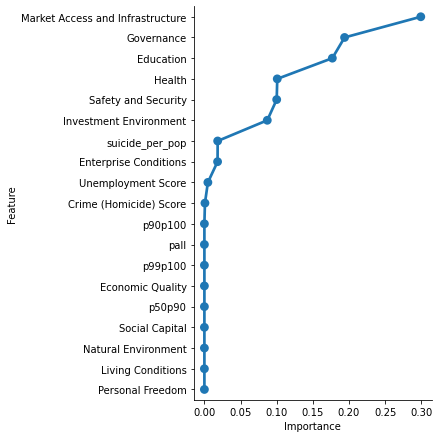

In [118]:
feature_values = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})
feature_values = feature_values.sort_values('Importance', ascending=False)

sns.factorplot('Importance', 'Feature', data=feature_values, size=6)